In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
%matplotlib inline

In [2]:
# Read player data
# This contains only players that started career in 2017 or earlier
player_data = pd.read_csv("Data/atp_players.csv")

# This contains all players up to date
player_data_additional = pd.read_csv("Data/tennis_atp-master/atp_players.csv")

# Main dataset
match_data = {}
whole_match_data = pd.DataFrame()

# Additional dataset
match_data_additional = {}
whole_match_data_additional = pd.DataFrame()

# Read match data in one DataFrame
for year in range(2000, 2022):
    data = pd.read_csv(f"Data/{year}.csv")
    match_data[str(year)] = data.copy()
    whole_match_data = pd.concat([whole_match_data, data])
    
    data = pd.read_csv(f"Data/tennis_atp-master/atp_matches_{year}.csv")
    match_data_additional[str(year)] = data.copy()
    whole_match_data_additional = pd.concat([whole_match_data_additional, data])
    
whole_match_data = whole_match_data.reset_index()
whole_match_data_additional = whole_match_data_additional.reset_index()

## Data description

### Player data

In [3]:
# Player_data shape
player_data.shape

(10912, 22)

In [4]:
# Player data entries
player_data.head(3)

,player_id,first_name,first_initial,last_name,full_name,player_url,flag_code,residence,birthplace,birthdate,...,birth_day,turned_pro,weight_lbs,weight_kg,height_ft,height_inches,height_cm,handedness,backhand,birth_date
0,a002,Ricardo,R,Acuna,Acuna R,http://www.atpworldtour.com/en/players/ricardo...,CHI,"Jupiter, FL, USA","Santiago, Chile",19580113,...,13.0,0.0,150.0,68.0,"5'9""",69.0,175.0,NaN,NaN,1958-01-13
1,a001,Sadiq,S,Abdullahi,Abdullahi S,http://www.atpworldtour.com/en/players/sadiq-a...,NGR,NaN,NaN,19600202,...,2.0,0.0,0.0,0.0,"0'0""",0.0,0.0,NaN,NaN,1960-02-02
2,a005,Nelson,N,Aerts,Aerts N,http://www.atpworldtour.com/en/players/nelson-...,BRA,NaN,"Cachoeira Do Sul, Brazil",19630425,...,25.0,0.0,165.0,75.0,"6'2""",74.0,188.0,NaN,NaN,1963-04-25


In [5]:
# Player data dtypes
player_data.dtypes

player_id         object
first_name        object
first_initial     object
last_name         object
full_name         object
player_url        object
flag_code         object
residence         object
birthplace        object
birthdate         object
birth_year       float64
birth_month      float64
birth_day        float64
turned_pro       float64
weight_lbs       float64
weight_kg        float64
height_ft         object
height_inches    float64
height_cm        float64
handedness        object
backhand          object
birth_date        object
dtype: object

In [6]:
# Check backhand and handedness technique
player_data[~player_data["backhand"].isnull()][["backhand", "handedness"]]

,backhand,handedness
41,One-Handed Backhand,Right-Handed
42,One-Handed Backhand,Right-Handed
53,Two-Handed Backhand,Right-Handed
105,Two-Handed Backhand,Left-Handed
113,One-Handed Backhand,Right-Handed
...,...,...
10881,Two-Handed Backhand,Right-Handed
10883,Two-Handed Backhand,Right-Handed
10886,Two-Handed Backhand,Right-Handed
10892,Two-Handed Backhand,Right-Handed


### Player data additional

In [7]:
# Player_data_additional shape 
player_data_additional.shape

(55569, 8)

In [8]:
# Entries
player_data_additional.head(3)

,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
0,100001,Gardnar,Mulloy,R,19131122,USA,NaN,Q54544
1,100002,Pancho,Segura,R,19210620,ECU,NaN,Q54581
2,100003,Frank,Sedgman,R,19271002,AUS,NaN,Q962049


In [9]:
player_data_additional.dtypes

player_id        int64
name_first      object
name_last       object
hand            object
dob             object
ioc             object
height         float64
wikidata_id     object
dtype: object

### Match data

In [10]:
# Match data shape
whole_match_data.shape

(58664, 55)

In [11]:
# Match data entries
whole_match_data.tail(5)

,index,atp,location,tournament,date,series,court,surface,round,best_of,...,ubw,ubl,lbw,lbl,sjw,sjl,maxw,maxl,avgw,avgl
58659,2484,61,Turin,Masters Cup,2021-11-19,Masters Cup,Indoor,Hard,Round Robin,3,...,NaN,NaN,NaN,NaN,NaN,NaN,2.65,1.63,2.49,1.53
58660,2485,61,Turin,Masters Cup,2021-11-19,Masters Cup,Indoor,Hard,Round Robin,3,...,NaN,NaN,NaN,NaN,NaN,NaN,1.16,7.71,1.12,6.27
58661,2486,61,Turin,Masters Cup,2021-11-20,Masters Cup,Indoor,Hard,Semifinals,3,...,NaN,NaN,NaN,NaN,NaN,NaN,1.18,7.40,1.13,5.83
58662,2487,61,Turin,Masters Cup,2021-11-20,Masters Cup,Indoor,Hard,Semifinals,3,...,NaN,NaN,NaN,NaN,NaN,NaN,3.32,1.45,2.99,1.39
58663,2488,61,Turin,Masters Cup,2021-11-21,Masters Cup,Indoor,Hard,The Final,3,...,NaN,NaN,NaN,NaN,NaN,NaN,2.65,1.63,2.44,1.56


In [12]:
# Match data types
whole_match_data.dtypes

index           int64
atp             int64
location       object
tournament     object
date           object
series         object
court          object
surface        object
round          object
best_of         int64
winner         object
loser          object
wrank         float64
lrank          object
w1            float64
l1            float64
w2             object
l2             object
w3             object
l3             object
w4            float64
l4            float64
w5            float64
l5            float64
wsets         float64
lsets         float64
comment        object
cbw           float64
cbl           float64
gbw           float64
gbl           float64
iww           float64
iwl           float64
sbw           float64
sbl           float64
b365w         float64
b365l         float64
b_ww          float64
b_wl          float64
exw            object
exl           float64
psw           float64
psl           float64
wpts          float64
lpts          float64
ubw       

### Match data additional

In [13]:
# Shape
whole_match_data_additional.shape

(65894, 50)

In [14]:
whole_match_data_additional.head(3)

,index,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,0,2000-301,Auckland,Hard,32,A,20000110,1,103163,1.0,...,55.0,39.0,29.0,17.0,4.0,7.0,11.0,1612.0,63.0,595.0
1,1,2000-301,Auckland,Hard,32,A,20000110,2,102607,NaN,...,32.0,25.0,18.0,12.0,3.0,6.0,211.0,157.0,49.0,723.0
2,2,2000-301,Auckland,Hard,32,A,20000110,3,103252,NaN,...,33.0,20.0,7.0,8.0,7.0,11.0,48.0,726.0,59.0,649.0


In [15]:
# Dtypes
print(whole_match_data_additional.dtypes.to_string())

index                   int64
tourney_id             object
tourney_name           object
surface                object
draw_size               int64
tourney_level          object
tourney_date            int64
match_num               int64
winner_id               int64
winner_seed           float64
winner_entry           object
winner_name            object
winner_hand            object
winner_ht             float64
winner_ioc             object
winner_age            float64
loser_id                int64
loser_seed            float64
loser_entry            object
loser_name             object
loser_hand             object
loser_ht              float64
loser_ioc              object
loser_age             float64
score                  object
best_of                 int64
round                  object
minutes               float64
w_ace                 float64
w_df                  float64
w_svpt                float64
w_1stIn               float64
w_1stWon              float64
w_2ndWon  

### Description of columns for player data
```text
    player_id       string - Player ID
    first_name      string - Player first name
    first_initial   string - Player first name initial
    last_name       string - Player last name
    full_name       string - Player full name
    player_url      string - Player url of atpworldtour website
    flag_code       string - Player country
    residence       string - Player home
    birthplace      string - Player birth
    birthdate       int    - Player birthdate
    birth_year      int    - Player birth year
    birth_month     int    - Player birth month
    birth_day       int    - Player birth day
    turned_pro      int    - Year when Player became pro
    weight_lbs      int    - Player weight, lbs
    weight_kg       int    - Player weight, kg
    height_ft       string - Player height, ft
    height_inches   int    - Player height, inch
    height_cm       int    - Player height, cm
    handedness      string - Player main hand
    backhand        string - Backhand technique (one hand/two hand)
    birth_date      string - Player birth date
```

### Description of columns for player data additional
```text
    player_id       int    - Player id (different from player data)
    name_first      string - First name
    name_last       string - Last name
    hand            string - Main hand
    dob             string - Date of birth
    ioc             string - Location
    height          int    - Height (cm)
    wikidata_id     string - Wikidata Id
```

### Description of columns for match data:
```text
Match data:
    atp          int    - ATP tournament number
    location     string - Location of the match
    tournament   string - Tournament name
    date         string - Date of match
    series       string - Name of ATP tennis series (Grand Slam, Masters, International or International Gold)
    court        string - Type of court (indoor/outdoor)
    surface      string - Type of surface
    round        string - Round in tournament
    best_of      int    - Best-of number (Max games in match)
    winner       string - Winner name
    loser        string - Loser name
    wrank        int    - ATP rank of the winner at the start of the game
    lrank        int    - ATP rank of the loser at the start of the game
    wpts         int    - ATP points of the winner at the start of the game
    lpts         int    - ATP points of the loser at the start of the game
    w1-w5        int    - Number of games won in N's set by match winner
    l1-l5        int    - Number of games won in N's set by match loser
    wsets        int    - Number of sets won by match winner
    lsets        int    - Number of sets won by match loser
    comment      string - Comment on the match (completed, won through retirement of loser, or via Walkover)

Odds data:
    (*)w         float  - Odds for a winner for a given bet company
    (*)l         float  - Odds for a loser for a given bet company
    maxw         float  - Max odds for a winner
    maxl         float  - Max odds for a loser
    avgw         float  - Average odds for a winner among all bet companies
    avgl         float  - Average odds for a loser among all bet companies
```

### Description of columns for additional match data:
```text
Match data:
    tourney_id                  string - A unique identifier for each tournament
    tourney_name                string - Tourney name
    surface                     string - Surface type
    draw_size                      int - Number of players in the draw
    tourney_level               string - Level of tourney
    tourney_date                   int - Date of tourney
    match_num                      int - Number of matches in game
    (winner\loser)_id              int - Id in atp_players
    (winner\loser)_seed            int - Seed
    (winner\loser)_entry        string - How player came to tourney (wild card / qualification / etc...)
    (winner\loser)_name         string - Player name
    (winner\loser)_hand         string - Player main hand
    (winner\loser)_ht              int - Player height
    (winner\loser)_ioc          string - Player country code
    (winner\loser)_age           float - Player age
    score                       string - Total score
    best_of                        int - Max num of games
    round                       string - Round in tourney (ex: Quarter final)
    minutes                        int - Match duration
    (w\l)_ace                      int - Number of aces
    (w\l)_df                       int - Number of doubles faults
    (w\l)_svpt                     int - Number of serve points
    (w\l)_1stIn                    int - Number of first serves made
    (w\l)_1stWon                   int - Number of first-serve points won
    (w\l)_2ndWon                   int - Number of second-serve points won
    (w\l)_SvGms                    int - Number of serve games
    (w\l)_bpSaved                  int - Number of break points saved
    (w\l)_bpFaced                  int - Number of break points faced
    (winner\loser)_rank            int - Rank at the start of the match
    (winner\loser)_rank_points     int - Points at the start of the match
```

In total we have 10912 players and 58664 matches during all period.

## Data exploration

### Match Data

In [16]:
# Match data columns
cols = whole_match_data.columns
cols

Index(['index', 'atp', 'location', 'tournament', 'date', 'series', 'court',
       'surface', 'round', 'best_of', 'winner', 'loser', 'wrank', 'lrank',
       'w1', 'l1', 'w2', 'l2', 'w3', 'l3', 'w4', 'l4', 'w5', 'l5', 'wsets',
       'lsets', 'comment', 'cbw', 'cbl', 'gbw', 'gbl', 'iww', 'iwl', 'sbw',
       'sbl', 'b365w', 'b365l', 'b_ww', 'b_wl', 'exw', 'exl', 'psw', 'psl',
       'wpts', 'lpts', 'ubw', 'ubl', 'lbw', 'lbl', 'sjw', 'sjl', 'maxw',
       'maxl', 'avgw', 'avgl'],
      dtype='object')

In [20]:
whole_match_data[["lrank", "wrank"]].isna().any(axis=1).sum()

150

In [21]:
# Delete nans in lrank and wrank since there are not many of them
whole_match_data = whole_match_data.drop(whole_match_data.index[whole_match_data["wrank"].isna()
                                         | whole_match_data["lrank"].isna()], axis=0)

In [22]:
# Strange "NR" rank
whole_match_data[whole_match_data["lrank"] == "NR"]["lrank"]

9596    NR
Name: lrank, dtype: object

In [23]:
# Drop "NR" rank
whole_match_data = whole_match_data.drop(whole_match_data[whole_match_data["lrank"] == "NR"].index)

In [24]:
# Set lrank type to int
whole_match_data.lrank = whole_match_data.lrank.astype(int)

In [25]:
# Describe data
whole_match_data[cols[0:25]].describe()

,index,atp,best_of,wrank,lrank,w1,l1,w4,l4,w5,l5,wsets
count,58513.000000,58513.000000,58513.000000,58513.000000,58513.000000,58202.000000,58205.000000,5440.000000,5440.000000,2061.000000,2061.000000,58242.000000
mean,1354.454138,32.768342,3.380086,59.142481,91.357339,5.796278,4.070406,5.775184,3.875184,6.611354,3.752547,2.147282
std,795.147269,18.109228,0.784677,72.424892,115.019971,1.237501,1.841139,1.275164,1.893576,2.196610,2.734515,0.460575
min,0.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,668.000000,19.000000,3.000000,17.000000,35.000000,6.000000,3.000000,6.000000,2.000000,6.000000,2.000000,2.000000
50%,1337.000000,32.000000,3.000000,42.000000,65.000000,6.000000,4.000000,6.000000,4.000000,6.000000,3.000000,2.000000
75%,2035.000000,49.000000,3.000000,78.000000,104.000000,6.000000,6.000000,6.000000,6.000000,7.000000,5.000000,2.000000
max,2962.000000,69.000000,5.000000,1890.000000,2159.000000,7.000000,7.000000,7.000000,7.000000,70.000000,68.000000,3.000000


In [26]:
whole_match_data[cols[25:36]].describe()

,lsets,cbw,cbl,gbw,gbl,iww,iwl,sbw,sbl,b365w
count,58240.000000,17486.000000,17486.000000,5045.000000,5045.000000,13332.000000,13332.000000,5420.000000,5420.000000,49859.000000
mean,0.411504,1.812645,2.998690,1.739826,2.397907,1.672301,2.385011,1.793358,2.671702,1.830560
std,0.560033,0.868531,2.031276,0.614562,1.053733,0.585589,1.047003,0.751199,1.425002,1.118949
min,0.000000,1.000000,1.020000,1.010000,1.030000,1.010000,1.030000,0.000000,0.000000,0.971000
25%,0.000000,1.280000,1.720000,1.330000,1.650000,1.300000,1.650000,1.333000,1.670000,1.250000
50%,0.000000,1.550000,2.350000,1.550000,2.100000,1.500000,2.100000,1.571000,2.250000,1.500000
75%,1.000000,2.050000,3.400000,1.980000,2.800000,1.850000,2.800000,2.100000,3.000000,2.100000
max,2.000000,14.000000,25.000000,7.500000,11.000000,6.000000,10.000000,9.000000,13.000000,34.000000


In [27]:
whole_match_data[cols[36:47]].describe()

,b365l,b_ww,b_wl,exl,psw,psl,wpts,lpts,ubw,ubl
count,49881.000000,1096.000000,1096.000000,39344.000000,43573.000000,43573.000000,42360.000000,42359.000000,10646.000000,10646.000000
mean,3.504544,1.729261,2.544334,3.258644,1.928369,4.088493,1857.188787,1080.312968,1.817099,3.535415
std,3.439048,0.730471,1.327242,2.446355,1.303131,5.332782,2291.989338,1233.920003,0.996849,3.641123
min,0.967000,1.010000,1.020000,1.000000,0.974000,1.010000,1.000000,1.000000,1.010000,1.020000
25%,1.720000,1.250000,1.600000,1.740000,1.280000,1.790000,660.750000,510.000000,1.240000,1.750000
50%,2.500000,1.500000,2.150000,2.450000,1.560000,2.620000,1030.000000,765.000000,1.500000,2.500000
75%,3.750000,1.950000,3.100000,3.750000,2.150000,4.150000,1925.000000,1180.000000,2.030000,3.800000
max,67.000000,7.500000,9.000000,40.000000,46.000000,121.000000,16950.000000,16950.000000,18.000000,60.000000


In [28]:
whole_match_data[cols[47:]].describe()

,lbw,lbl,sjw,sjl,maxw,maxl,avgw,avgl
count,28071.000000,28081.000000,15545.000000,15552.000000,29036.000000,29036.000000,29036.000000,29036.000000
mean,1.810931,3.443596,1.797171,3.552808,2.001517,7.337434,1.842574,3.508977
std,1.031441,3.061030,1.004334,3.267079,1.550320,351.587293,1.082440,3.178516
min,1.000000,1.000000,1.000000,1.010000,1.010000,1.010000,1.010000,1.010000
25%,1.250000,1.730000,1.220000,1.730000,1.300000,1.830000,1.250000,1.730000
50%,1.500000,2.500000,1.500000,2.630000,1.590000,2.730000,1.520000,2.510000
75%,2.000000,4.000000,2.000000,4.000000,2.230000,4.390000,2.080000,3.870000
max,26.000000,51.000000,19.000000,81.000000,76.000000,42586.000000,23.450000,36.440000


In [29]:
# Best of stats
best_of_stats = pd.DataFrame(whole_match_data["best_of"].copy())
best_of_stats["count"] = 1
best_of_stats = best_of_stats.groupby("best_of").sum().reset_index()
best_of_stats

,best_of,count
0,3,47393
1,5,11120


In [30]:
# Wsets stats
wsets_stats = pd.DataFrame(whole_match_data["wsets"].copy())
wsets_stats["count"] = 1
wsets_stats = wsets_stats.groupby("wsets").sum().reset_index()
wsets_stats

,wsets,count
0,0.0,446
1,1.0,1182
2,2.0,45962
3,3.0,10652


In [31]:
# Find strage wsets values
whole_match_data[(whole_match_data["wsets"] < 2) & (whole_match_data["comment"] == "Completed")][["w1", "l1", "w2", "l2", "w3", "wsets"]]

,w1,l1,w2,l2,w3,wsets
3456,4.0,6.0,6.0,3.0,NaN,1.0
38251,6.0,3.0,7.0,6.0,NaN,0.0
43287,1.0,2.0,NaN,NaN,NaN,0.0
46934,6.0,1.0,7.0,6.0,NaN,1.0
49257,7.0,5.0,6.0,2.0,NaN,1.0
54504,6.0,7.0,3.0,4.0,NaN,0.0


In [32]:
# Collect stats for lsets
lsets_stats = pd.DataFrame(whole_match_data["lsets"].copy())
lsets_stats["count"] = 1
lsets_stats = lsets_stats.groupby("lsets").sum().reset_index()
lsets_stats

,lsets,count
0,0.0,36355
1,1.0,19804
2,2.0,2081


In [33]:
whole_match_data["round"].unique()

array(['1st Round', '2nd Round', 'Quarterfinals', 'Semifinals',
       'The Final', '3rd Round', '4th Round', 'Round Robin'], dtype=object)

In [34]:
whole_match_data["tournament"].unique()

array(['Australian Hardcourt Championships', 'Gold Flake Open',
       'Qatar Open', 'Heineken Open', 'Sydney International',
       'Australian Open', 'Dubai Open', 'Marseille Open', 'Sybase Open',
       'Kroger St. Jude', 'ABN AMRO World Tennis Tournament', 'AXA Cup',
       'Mexican Open', 'Copenhagen Open', 'Citrix Tennis Championships',
       'Chevrolet Cup', 'Colombia Open',
       'Franklin Templeton Tennis Classic', 'Indian Wells TMS',
       'Ericsson Open', 'Galleryfurniture.com Tennis Challenge',
       'Grand Prix Hassan II', 'Estoril Open', 'Monte Carlo Masters',
       'Open Seat Godo', 'Mallorca Open', 'BMW Open',
       'U.S. Clay Court Championships', 'Rome TMS', 'Hamburg TMS',
       'Internationaler Raiffeisen Grand Prix', 'French Open',
       'Gerry Weber Open', 'Stella Artois', 'Nottingham Open',
       'Heineken Trophy', 'Wimbledon', 'Swedish Open', 'Gstaad Open',
       'Hall of Fame Championships', 'Dutch Open', 'Mercedes Cup',
       'Croatia Open', 'General

In [35]:
correlation = whole_match_data.corr()

<AxesSubplot:>

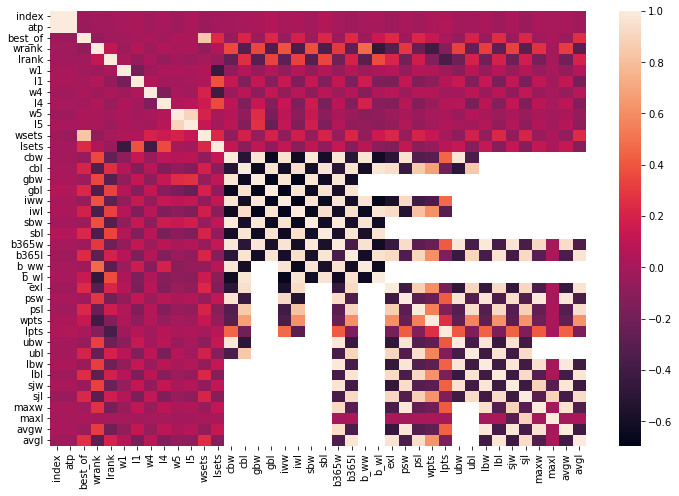

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation)

Here are some observations.

1. Mean of WRank and WPts is more than mean of LRank and LPts, which is expected.
2. Most of the matches are played in bo3 format, lesser played in bo5. So there are some disbalance in dataset.
3. Almost all of the matches that are won by wsets < 2 are not completed. The completed matches have strange wsets value that does not corresponds with w1-w5 values.
4. Most of the matches are loses by 0 set wins.
5. Average odds for a winner is ~1.8 which means that if we play in random, we always lose.
6. Max odds for a winner is ~2 which means if we play in random and always bet with best coefficients, we don't lose money.
7. Average and max odds for loser is more than for a winner, which is expected.
8. In correlation matrix we have expected correlation between avgw/maxw and wrank. Other correlations are not so important.

### Match data additional

In [37]:
# Match data columns
cols = whole_match_data_additional.columns
cols

Index(['index', 'tourney_id', 'tourney_name', 'surface', 'draw_size',
       'tourney_level', 'tourney_date', 'match_num', 'winner_id',
       'winner_seed', 'winner_entry', 'winner_name', 'winner_hand',
       'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'w_df',
       'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved',
       'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon',
       'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank',
       'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [38]:
whole_match_data_additional.describe()

,index,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,loser_id,loser_seed,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,65894.000000,65894.000000,6.589400e+04,65894.000000,65894.000000,27355.000000,63258.000000,65891.000000,65894.000000,15007.000000,...,59811.000000,59811.000000,59811.000000,59812.000000,59811.000000,59811.000000,65372.000000,65372.000000,64536.000000,64536.000000
mean,1520.890809,54.488239,2.009977e+07,83.101254,106245.670789,7.338220,186.033009,26.303068,106439.171351,8.844539,...,48.343181,32.242781,14.991791,12.288638,4.777382,8.634850,80.234626,1578.670899,118.723441,951.239587
std,894.909209,39.583693,6.236712e+04,126.564433,11915.042956,6.755788,7.318269,3.914940,12412.704164,7.274617,...,19.212393,14.364269,7.227612,4.229345,3.269383,4.142664,140.637367,2013.828098,187.689380,1105.999057
min,0.000000,2.000000,2.000010e+07,1.000000,100644.000000,1.000000,1.700000,14.926762,100644.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,748.000000,32.000000,2.005010e+07,10.000000,103428.000000,3.000000,183.000000,23.397673,103344.000000,4.000000,...,35.000000,22.000000,10.000000,9.000000,2.000000,6.000000,18.000000,564.000000,36.000000,420.000000
50%,1499.000000,32.000000,2.010022e+07,26.000000,104259.000000,5.000000,185.000000,26.132786,104252.000000,7.000000,...,45.000000,30.000000,14.000000,11.000000,4.000000,8.000000,45.000000,927.000000,68.000000,691.000000
75%,2283.000000,64.000000,2.015081e+07,102.000000,105023.000000,9.000000,190.000000,29.010267,105138.000000,12.000000,...,59.000000,40.000000,19.000000,15.000000,7.000000,11.000000,85.000000,1690.000000,115.000000,1085.000000
max,3377.000000,128.000000,2.021120e+07,1701.000000,210107.000000,35.000000,211.000000,42.368241,210274.000000,35.000000,...,328.000000,284.000000,101.000000,91.000000,27.000000,38.000000,2101.000000,16950.000000,2159.000000,16950.000000


In [39]:
correlation = whole_match_data_additional.corr()

<AxesSubplot:>

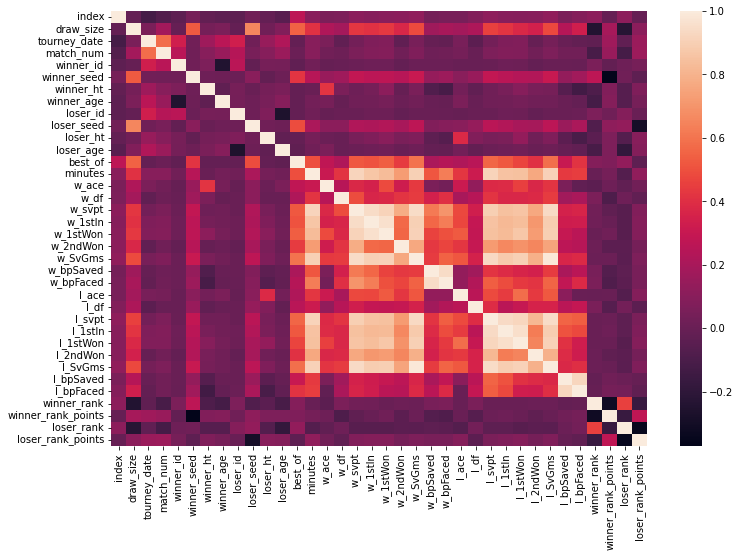

In [40]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation)

Here are some observations.

1. All statements from main data also included.
2. Mean of height of winner and loser are differs, but not so much.
3. In correlation we don't see anything new, or something that will use in model

### Player Data

In [41]:
# Player data
player_data.head(3)

,player_id,first_name,first_initial,last_name,full_name,player_url,flag_code,residence,birthplace,birthdate,...,birth_day,turned_pro,weight_lbs,weight_kg,height_ft,height_inches,height_cm,handedness,backhand,birth_date
0,a002,Ricardo,R,Acuna,Acuna R,http://www.atpworldtour.com/en/players/ricardo...,CHI,"Jupiter, FL, USA","Santiago, Chile",19580113,...,13.0,0.0,150.0,68.0,"5'9""",69.0,175.0,NaN,NaN,1958-01-13
1,a001,Sadiq,S,Abdullahi,Abdullahi S,http://www.atpworldtour.com/en/players/sadiq-a...,NGR,NaN,NaN,19600202,...,2.0,0.0,0.0,0.0,"0'0""",0.0,0.0,NaN,NaN,1960-02-02
2,a005,Nelson,N,Aerts,Aerts N,http://www.atpworldtour.com/en/players/nelson-...,BRA,NaN,"Cachoeira Do Sul, Brazil",19630425,...,25.0,0.0,165.0,75.0,"6'2""",74.0,188.0,NaN,NaN,1963-04-25


In [42]:
# Describe player data
player_data.describe()

,birth_year,birth_month,birth_day,turned_pro,weight_lbs,weight_kg,height_inches,height_cm
count,5114.000000,5114.000000,5114.000000,1533.000000,2706.000000,2706.000000,2658.000000,2658.000000
mean,1968.991201,6.134142,15.437427,1807.857143,165.145972,74.941242,69.377728,176.197517
std,24.776571,3.414743,8.746428,584.589088,44.659854,20.263036,14.765292,37.510783
min,1864.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1958.000000,3.000000,8.000000,1988.000000,160.000000,73.000000,70.000000,178.000000
50%,1976.000000,6.000000,15.000000,1996.000000,170.000000,77.000000,72.000000,183.000000
75%,1988.000000,9.000000,23.000000,2003.000000,180.000000,82.000000,74.000000,188.000000
max,2001.000000,12.000000,31.000000,2017.000000,1488.000000,675.000000,83.000000,211.000000


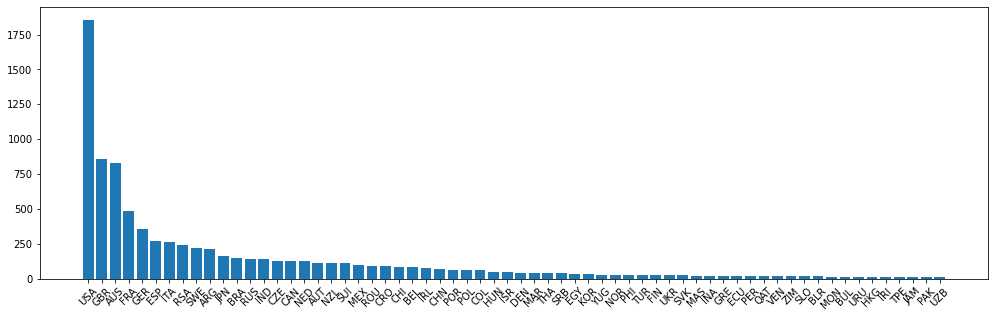

In [43]:
# Collect data about player country
player_country = pd.DataFrame(player_data["flag_code"].copy())
player_country["count"] = 1
player_country = player_country.groupby("flag_code").sum().reset_index()
player_country = player_country[player_country["count"] > 10].reset_index()
player_country = player_country.sort_values("count", ascending=False).reset_index()

# Plot data
plt.figure(figsize=(17, 5))
plt.bar(player_country.index, player_country["count"])
plt.xticks(player_country.index, player_country["flag_code"], rotation=45)
plt.show()

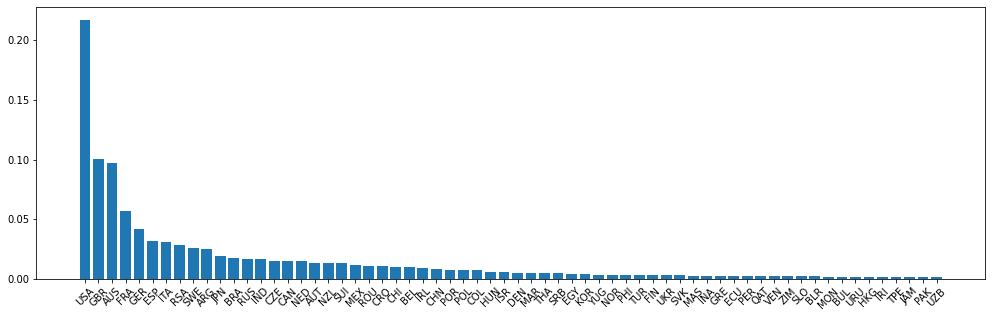

In [44]:
s = player_country["count"].sum()

# Plot data (in persents)
plt.figure(figsize=(17, 5))
plt.bar(player_country.index, player_country["count"] / s)
plt.xticks(player_country.index, player_country["flag_code"], rotation=45)
plt.show()

In [45]:
correlation = player_data.corr()

<AxesSubplot:>

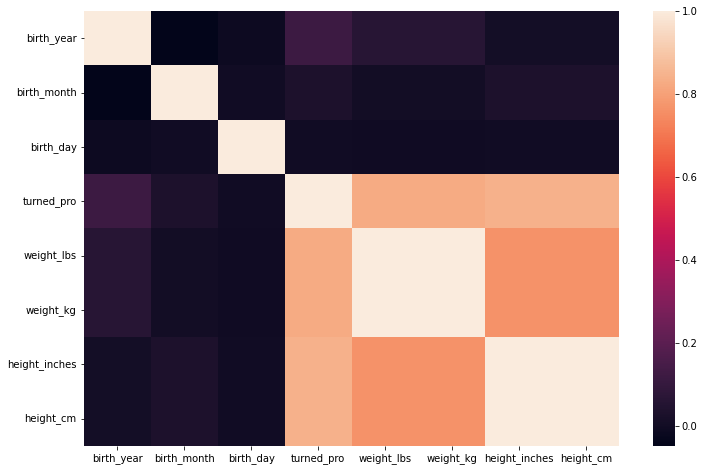

In [46]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation)

Here are some observations:

1. Median of the player birthyear is 1976 but according to [site](https://khelnow.com/olympic-sports/top-five-oldest-active-tennis-players) oldest pro tennis player at 2021 is about 41 y.o. so, in dataset we can get rid from most of the players.
2. Most of the players are from USA, so it may disbalance the dataset
3. Expected correlation between height and weight
4. Strange correlation between turned_pro and height/weight. Maybe new pro players are taller.

### Player Data additional

In [47]:
# Player data
player_data_additional.head(3)

,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
0,100001,Gardnar,Mulloy,R,19131122,USA,NaN,Q54544
1,100002,Pancho,Segura,R,19210620,ECU,NaN,Q54581
2,100003,Frank,Sedgman,R,19271002,AUS,NaN,Q962049


In [48]:
# Describe player data
player_data_additional.describe()

,player_id,height
count,55569.000000,2388.000000
mean,138238.555256,183.637772
std,34523.402589,6.575897
min,100001.000000,145.000000
25%,113908.000000,180.000000
50%,127800.000000,183.000000
75%,141692.000000,188.000000
max,210536.000000,211.000000


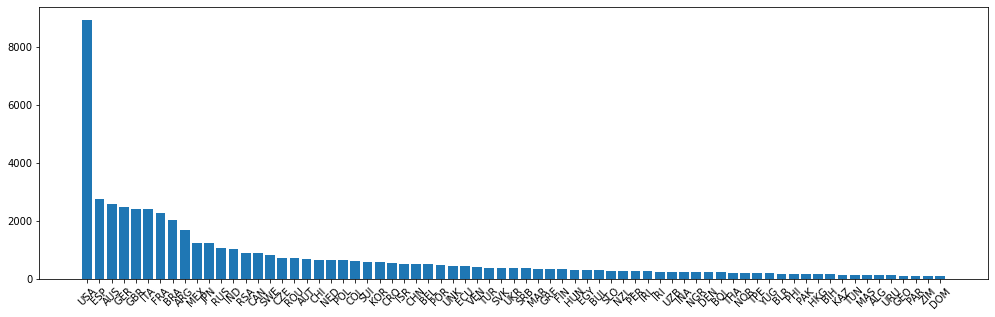

In [49]:
# Collect data about player country
player_country = pd.DataFrame(player_data_additional["ioc"].copy())
player_country["count"] = 1
player_country = player_country.groupby("ioc").sum().reset_index()
player_country = player_country[player_country["count"] > 100].reset_index()
player_country = player_country.sort_values("count", ascending=False).reset_index()

# Plot data
plt.figure(figsize=(17, 5))
plt.bar(player_country.index, player_country["count"])
plt.xticks(player_country.index, player_country["ioc"], rotation=45)
plt.show()

In [50]:
correlation = player_data_additional.corr()

<AxesSubplot:>

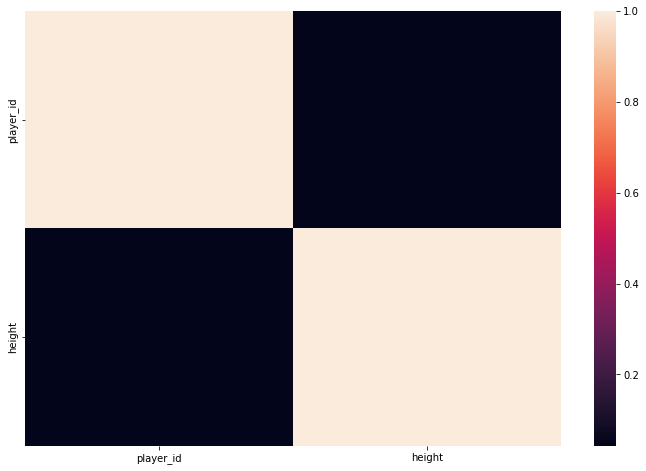

In [51]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation)

Here are some observations:

1. Here the mean height is more than in previous, maybe because here better data quality (min is not 0)
2. Here country distribution slightly differs in 2-10 places. But main trend is saved

## Data quality

### Match Data

In [52]:
cols = whole_match_data.columns
# Match data nulls
whole_match_data.isnull().sum()

index             0
atp               0
location          0
tournament        0
date              0
series            0
court             0
surface           0
round             0
best_of           0
winner            0
loser             0
wrank             0
lrank             0
w1              311
l1              308
w2              858
l2              857
w3            31245
l3            31246
w4            53073
l4            53073
w5            56452
l5            56452
wsets           271
lsets           273
comment           0
cbw           41027
cbl           41027
gbw           53468
gbl           53468
iww           45181
iwl           45181
sbw           53093
sbl           53093
b365w          8654
b365l          8632
b_ww          57417
b_wl          57417
exw           19174
exl           19169
psw           14940
psl           14940
wpts          16153
lpts          16154
ubw           47867
ubl           47867
lbw           30442
lbl           30432
sjw           42968


In [54]:
# Check duplicates in data
whole_match_data[whole_match_data.duplicated(keep=False)]

,index,atp,location,tournament,date,series,court,surface,round,best_of,...,ubw,ubl,lbw,lbl,sjw,sjl,maxw,maxl,avgw,avgl


In [55]:
# Check that there is no nulls
whole_match_data[whole_match_data[cols[:11]].isna().any(axis=1)][cols[:11]]

,index,atp,location,tournament,date,series,court,surface,round,best_of,winner


In [56]:
# Check nans in wrank
whole_match_data[whole_match_data[cols[11:12]].isna().any(axis=1)][cols[11:12]]

,loser


In [57]:
# Check nans in lranks
whole_match_data[whole_match_data[cols[12:13]].isna().any(axis=1)][cols[12:13]]

,wrank


In [58]:
# Check nans in w1-w5, l1-l5
whole_match_data[whole_match_data[cols[13:23]].isna().any(axis=1)][cols[13:23]]

,lrank,w1,l1,w2,l2,w3,l3,w4,l4,w5
0,77,6.0,4.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN
1,56,6.0,3.0,6.0,3.0,NaN,NaN,NaN,NaN,NaN
2,655,6.0,7.0,7.0,5.0,6.0,3.0,NaN,NaN,NaN
3,87,6.0,1.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN
4,198,7.0,6.0,5.0,7.0,6.0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
58659,5,2.0,6.0,7.0,5.0,7.0,6.0,NaN,NaN,NaN
58660,12,6.0,2.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN
58661,8,6.0,4.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN
58662,1,7.0,6.0,4.0,6.0,6.0,3.0,NaN,NaN,NaN


In [59]:
# Check nans in both wsets and lsets
whole_match_data[whole_match_data[cols[24:26]].isna().any(axis=1)][cols[24:26]]

,wsets,lsets
9479,NaN,NaN
9584,NaN,NaN
10678,NaN,NaN
11229,NaN,NaN
11430,NaN,NaN
...,...,...
57755,NaN,NaN
58005,NaN,NaN
58351,NaN,NaN
58432,NaN,NaN


In [60]:
# Check comments on nans in wsets
whole_match_data[(whole_match_data[cols[23:25]].isna().any(axis=1)) & (whole_match_data["comment"] != "Completed")]["comment"]

69        Retired
77        Retired
92        Retired
118       Retired
162       Retired
           ...   
58487     Retired
58601     Retired
58610    Walkover
58630     Retired
58650     Retired
Name: comment, Length: 2096, dtype: object

In [61]:
# No nans in comments
whole_match_data[whole_match_data[cols[25:26]].isna().any(axis=1)][cols[25:26]]

,lsets
9479,NaN
9584,NaN
10678,NaN
11229,NaN
11430,NaN
...,...
57755,NaN
58005,NaN
58351,NaN
58432,NaN


In [62]:
# Check if nans in all odds section together
whole_match_data[whole_match_data[cols[26:]].isna().all(axis=1)][cols[26:]]

,comment,cbw,cbl,gbw,gbl,iww,iwl,sbw,sbl,b365w,...,ubw,ubl,lbw,lbl,sjw,sjl,maxw,maxl,avgw,avgl


In [63]:
# Find most resent match with no odds at all
whole_match_data[whole_match_data[cols[26:]].isna().all(axis=1)].sort_values("date")

,index,atp,location,tournament,date,series,court,surface,round,best_of,...,ubw,ubl,lbw,lbl,sjw,sjl,maxw,maxl,avgw,avgl


In [64]:
# Check matches without max/avg odds
whole_match_data[whole_match_data[["maxw", "maxl", "avgw", "avgl"]].isna().all(axis=1)][["maxw", "maxl", "avgw", "avgl"]]

,maxw,maxl,avgw,avgl
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
47898,NaN,NaN,NaN,NaN
48683,NaN,NaN,NaN,NaN
51320,NaN,NaN,NaN,NaN
54538,NaN,NaN,NaN,NaN


In [65]:
# Check last date of match without max/avg odds
whole_match_data[whole_match_data[["maxw", "maxl", "avgw", "avgl"]].isna().all(axis=1)].sort_values("date")

,index,atp,location,tournament,date,series,court,surface,round,best_of,...,ubw,ubl,lbw,lbl,sjw,sjl,maxw,maxl,avgw,avgl
0,0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,68,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,67,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,66,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,65,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47898,870,23,Monte Carlo,Monte Carlo Masters,2017-04-18,Masters 1000,Outdoor,Clay,1st Round,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48683,1655,41,Bastad,SkiStar Swedish Open,2017-07-18,ATP250,Outdoor,Clay,1st Round,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51320,1659,41,Bastad,SkiStar Swedish Open,2018-07-17,ATP250,Outdoor,Clay,1st Round,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54538,2240,55,Chengdu,Chengdu Open,2019-09-24,ATP250,Outdoor,Hard,1st Round,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here are some observations:

1. We have no null's in atp-losee columns
2. Some of wrank and lrank has a null values, it is may be due to a first match in career
3. It is ok to have null's in w1-w5 and l1-l5 columns since most of the matches do not play all 5 games
4. There is a null's in wsets and lsets values. All of the matches are from them are incomplete. Possibly can get rid of them
5. There are some matches with no bets at all. Last of them was in 2005
6. There is a lot of matches without max and average odds. Possibly it can be replased with max and average value among all odds for the match, but it will not so accurate.

### Match data additional

In [66]:
whole_match_data_additional.isnull().sum()

index                     0
tourney_id                0
tourney_name              0
surface                   0
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_seed           38539
winner_entry          57766
winner_name               0
winner_hand               9
winner_ht              2636
winner_ioc                0
winner_age                3
loser_id                  0
loser_seed            50887
loser_entry           52540
loser_name                0
loser_hand               41
loser_ht               5171
loser_ioc                 0
loser_age                 0
score                     0
best_of                   0
round                     0
minutes                7391
w_ace                  6083
w_df                   6083
w_svpt                 6083
w_1stIn                6083
w_1stWon               6083
w_2ndWon               6083
w_SvGms                6082
w_bpSaved           

In [67]:
whole_match_data_additional[whole_match_data_additional.duplicated()]

,index,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points


In [68]:
# Check rounds
whole_match_data_additional["draw_size"].unique()

array([ 32,  56,  48,  96,  64, 128,   8,   4,  28,  16,  24,  12,   2],
      dtype=int64)

In [69]:
whole_match_data_additional["tourney_name"].unique()

array(['Auckland', 'St. Poelten', 'Munich', ...,
       'Davis Cup WG2 R1: SUI vs EST', 'Davis Cup WG2 R1: THA vs DEN',
       'Davis Cup WG2 R1: TUR vs LAT'], dtype=object)

In [70]:
whole_match_data_additional[whole_match_data_additional["tourney_name"].str.startswith("Munich")]

,index,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
62,62,2000-308,Munich,Clay,32,A,20000501,1,102358,1.0,...,79.0,47.0,14.0,13.0,13.0,16.0,9.0,1749.0,83.0,485.0
63,63,2000-308,Munich,Clay,32,A,20000501,2,103344,NaN,...,43.0,28.0,10.0,9.0,11.0,14.0,86.0,476.0,185.0,180.0
64,64,2000-308,Munich,Clay,32,A,20000501,3,102562,NaN,...,27.0,18.0,6.0,7.0,5.0,8.0,42.0,822.0,68.0,583.0
65,65,2000-308,Munich,Clay,32,A,20000501,4,101792,8.0,...,46.0,26.0,9.0,8.0,8.0,11.0,54.0,724.0,201.0,164.0
66,66,2000-308,Munich,Clay,32,A,20000501,5,103163,3.0,...,22.0,12.0,7.0,7.0,1.0,5.0,19.0,1230.0,94.0,418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63253,86,2021-0308,Munich,Clay,32,A,20210426,296,105526,7.0,...,76.0,44.0,31.0,16.0,11.0,16.0,44.0,1440.0,36.0,1619.0
63254,87,2021-0308,Munich,Clay,32,A,20210426,297,125802,NaN,...,51.0,40.0,18.0,16.0,5.0,10.0,107.0,736.0,6.0,6125.0
63255,88,2021-0308,Munich,Clay,32,A,20210426,298,105932,5.0,...,35.0,21.0,4.0,8.0,4.0,9.0,35.0,1645.0,24.0,2270.0
63256,89,2021-0308,Munich,Clay,32,A,20210426,299,105526,7.0,...,33.0,22.0,10.0,9.0,4.0,9.0,44.0,1440.0,107.0,736.0


### Player Data

In [71]:
# Player data columns
cols = player_data.columns
cols

Index(['player_id', 'first_name', 'first_initial', 'last_name', 'full_name',
       'player_url', 'flag_code', 'residence', 'birthplace', 'birthdate',
       'birth_year', 'birth_month', 'birth_day', 'turned_pro', 'weight_lbs',
       'weight_kg', 'height_ft', 'height_inches', 'height_cm', 'handedness',
       'backhand', 'birth_date'],
      dtype='object')

In [72]:
# Check nulls
player_data.isnull().sum()

player_id           0
first_name          0
first_initial      27
last_name           0
full_name           0
player_url          0
flag_code        2185
residence        8898
birthplace       7874
birthdate        5798
birth_year       5798
birth_month      5798
birth_day        5798
turned_pro       9379
weight_lbs       8206
weight_kg        8206
height_ft        8254
height_inches    8254
height_cm        8254
handedness       9776
backhand         9776
birth_date       5798
dtype: int64

In [73]:
# Get only ~50 y.o. players
player_data_young = player_data[player_data["birth_year"] > 1970]

In [74]:
# Player data shape
player_data_young.shape

(2966, 22)

In [75]:
# Player data nulls
player_data_young.isnull().sum()

player_id           0
first_name          0
first_initial       0
last_name           0
full_name           0
player_url          0
flag_code           0
residence        1393
birthplace       1338
birthdate           0
birth_year          0
birth_month         0
birth_day           0
turned_pro       1869
weight_lbs       1305
weight_kg        1305
height_ft        1360
height_inches    1360
height_cm        1360
handedness       1854
backhand         1854
birth_date          0
dtype: int64

Here are some observations:

1. If to consider only 'young' (<50 y.o.) players, there is no much null values.
2. Residence and birthplace possibly can be fillen with plag code value
3. Null's in turned pro values possibly can be fillen with calculating average year for player to turned pro and adding to birthyear
4. Weight and height values can be restored with mean of this values
5. Handedness and Backhand possible can not be restored, so either to fill it with same distribution as in non-null values or do not use this value at all

### Player data additional

In [76]:
# Player data columns
cols = player_data_additional.columns
cols

Index(['player_id', 'name_first', 'name_last', 'hand', 'dob', 'ioc', 'height',
       'wikidata_id'],
      dtype='object')

In [77]:
# Check nulls
player_data_additional.isnull().sum()

player_id          0
name_first       177
name_last         42
hand             243
dob            10887
ioc               55
height         53181
wikidata_id    50678
dtype: int64

In [78]:
# Get only ~50 y.o. players
player_data_young = player_data_additional[player_data_additional["dob"] > "19700101"]

In [79]:
player_data_young.shape

(39088, 8)

In [80]:
# Player data nulls
player_data_young.isnull().sum()

player_id          0
name_first         1
name_last          1
hand              44
dob                0
ioc                0
height         37784
wikidata_id    36179
dtype: int64

Here are some observations:

1. If to consider only 'young' (<50 y.o.) players, there is no much null values.
2. But in height there is still a lot of nulls
4. Height values can be restored with mean of this values (may be also consider mean for each country)
5. There is not much nulls in hand values, possibly can be restored with random distributed by distribution of hand values